IA & Data science (3i026) -- 2018-2019
--------
*&copy; Equipe pédagogique: Manon Ansart, Vincent Guigue, Marie-Jeanne Lesot, Christophe Marsala, Olivier Schwander.*

# TD-TME10 : étude de cas


<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

QIAN Christian(3520242) - GUERASSIMOV Alexandre(3520877)

<font color="RED" size="+1">**[Q]**</font> **Renommer ce fichier ipython**

Compléter le nom de ce notebook en rajoutant les noms des membres du binômes séparés par un tiret.

## Préparation


Décompresser l'archive, elle crée le répertoire <code>tme10</code> qui contient un fichier ipython à ouvrir (ce fichier-ci) et un sous-répertoire <code>data</code> contenant la base d'apprentissage <code>countries-3i026.csv</code> utilisée dans cette séance.

In [11]:
import numpy as np
import pandas as pd
#pour supprimer les warnings sur retouche des copies de dataframe
pd.options.mode.chained_assignment = None 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')

# Importation de la librairie iads
import iads as iads

# importation de LabeledSet
from iads import LabeledSet as ls

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut
from iads import kmoyennes as km


## Dataset: empreinte écologique des pays

Ce dataset est fourni dans le répertoire <code>data</code>: fichier <code>countries-3i026.csv</code>.

Le fichier fourni est extrait du fichier original qui peut être trouvé sur le site Kaggle:
https://www.kaggle.com/footprintnetwork/ecological-footprint/version/1



### Chargement des données

In [12]:
data_brut = pd.read_csv("data/countries-3i026.csv")
data_brut[0:5]  

,Country,Region,Population (millions),HDI,GDP/Capita,Total Ecological Footprint,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Earths Required,Countries Required
0,Singapore,Asia-Pacific,5.300,0.91,53122.4,7.97,0.00,0.00,0.00,0.01,0.03,0.05,4.61,159.47
1,Israel,Middle East/Central Asia,7.640,0.89,33718.9,6.22,0.22,0.01,0.03,0.02,0.08,0.35,3.59,17.59
2,Kuwait,Middle East/Central Asia,3.250,0.82,41830.5,8.13,0.02,0.01,0.00,0.37,0.15,0.55,4.70,14.68
3,United Arab Emirates,Middle East/Central Asia,9.206,0.83,40817.4,7.93,0.02,0.00,0.07,0.47,0.00,0.56,4.58,14.16
4,Bahrain,Middle East/Central Asia,1.320,0.82,24299.0,7.49,0.01,0.00,0.00,0.46,0.10,0.58,4.33,12.96


Dans ce dataset, la variable <code>Country</code> sert d'identifiant pour chaque exemple.

### Examen et prétraitement de la base

<font size="+1" color="RED">**[Q]**</font> Afficher les valeurs minimales, maximales, moyennes, et médianes de chaque variable présentes dans le dataframe.

In [5]:
datanum= data_brut.iloc[: , 2:]

In [5]:
datanum.max()

Population (millions)           1408.04
HDI                                0.94
GDP/Capita                    100172.00
Total Ecological Footprint        10.80
Cropland                           5.42
Grazing Land                       8.23
Forest Land                       19.50
Fishing Water                      4.76
Urban Land                         0.27
Total Biocapacity                 26.31
Earths Required                    6.24
Countries Required               159.47
dtype: float64

In [6]:
datanum.min()

Population (millions)           1.11
HDI                             0.34
GDP/Capita                    276.69
Total Ecological Footprint      0.42
Cropland                        0.00
Grazing Land                    0.00
Forest Land                     0.00
Fishing Water                   0.00
Urban Land                      0.00
Total Biocapacity               0.05
Earths Required                 0.24
Countries Required              0.08
dtype: float64

In [7]:
datanum.mean()

Population (millions)            46.652121
HDI                               0.686445
GDP/Capita                    13899.390671
Total Ecological Footprint        3.166443
Cropland                          0.584828
Grazing Land                      0.519655
Forest Land                       1.146966
Fishing Water                     0.368897
Urban Land                        0.072069
Total Biocapacity                 2.843691
Earths Required                   1.828658
Countries Required                3.542081
dtype: float64

In [8]:
datanum.median()

Population (millions)           10.880
HDI                              0.725
GDP/Capita                    5226.300
Total Ecological Footprint       2.340
Cropland                         0.370
Grazing Land                     0.150
Forest Land                      0.330
Fishing Water                    0.080
Urban Land                       0.060
Total Biocapacity                1.320
Earths Required                  1.350
Countries Required               1.660
dtype: float64

Avec le package <code>seaborn</code>, nous pouvons afficher les corrélations entre les variables.

Avant de pouvoir utiliser la fonction pairplot, il est nécessaire de remplacer les valeurs <code>NaN</code> présentes dans le dataframe par la valeur 0. Pour cela, on utilise la méthode <code>fillna</code>.

In [13]:
data = data_brut.fillna(0)

<font size="+1" color="RED">**[Q]**</font> Afficher la matrice des corrélations entre les variables (fonction <code>pairplot</code>) de ce dataset.

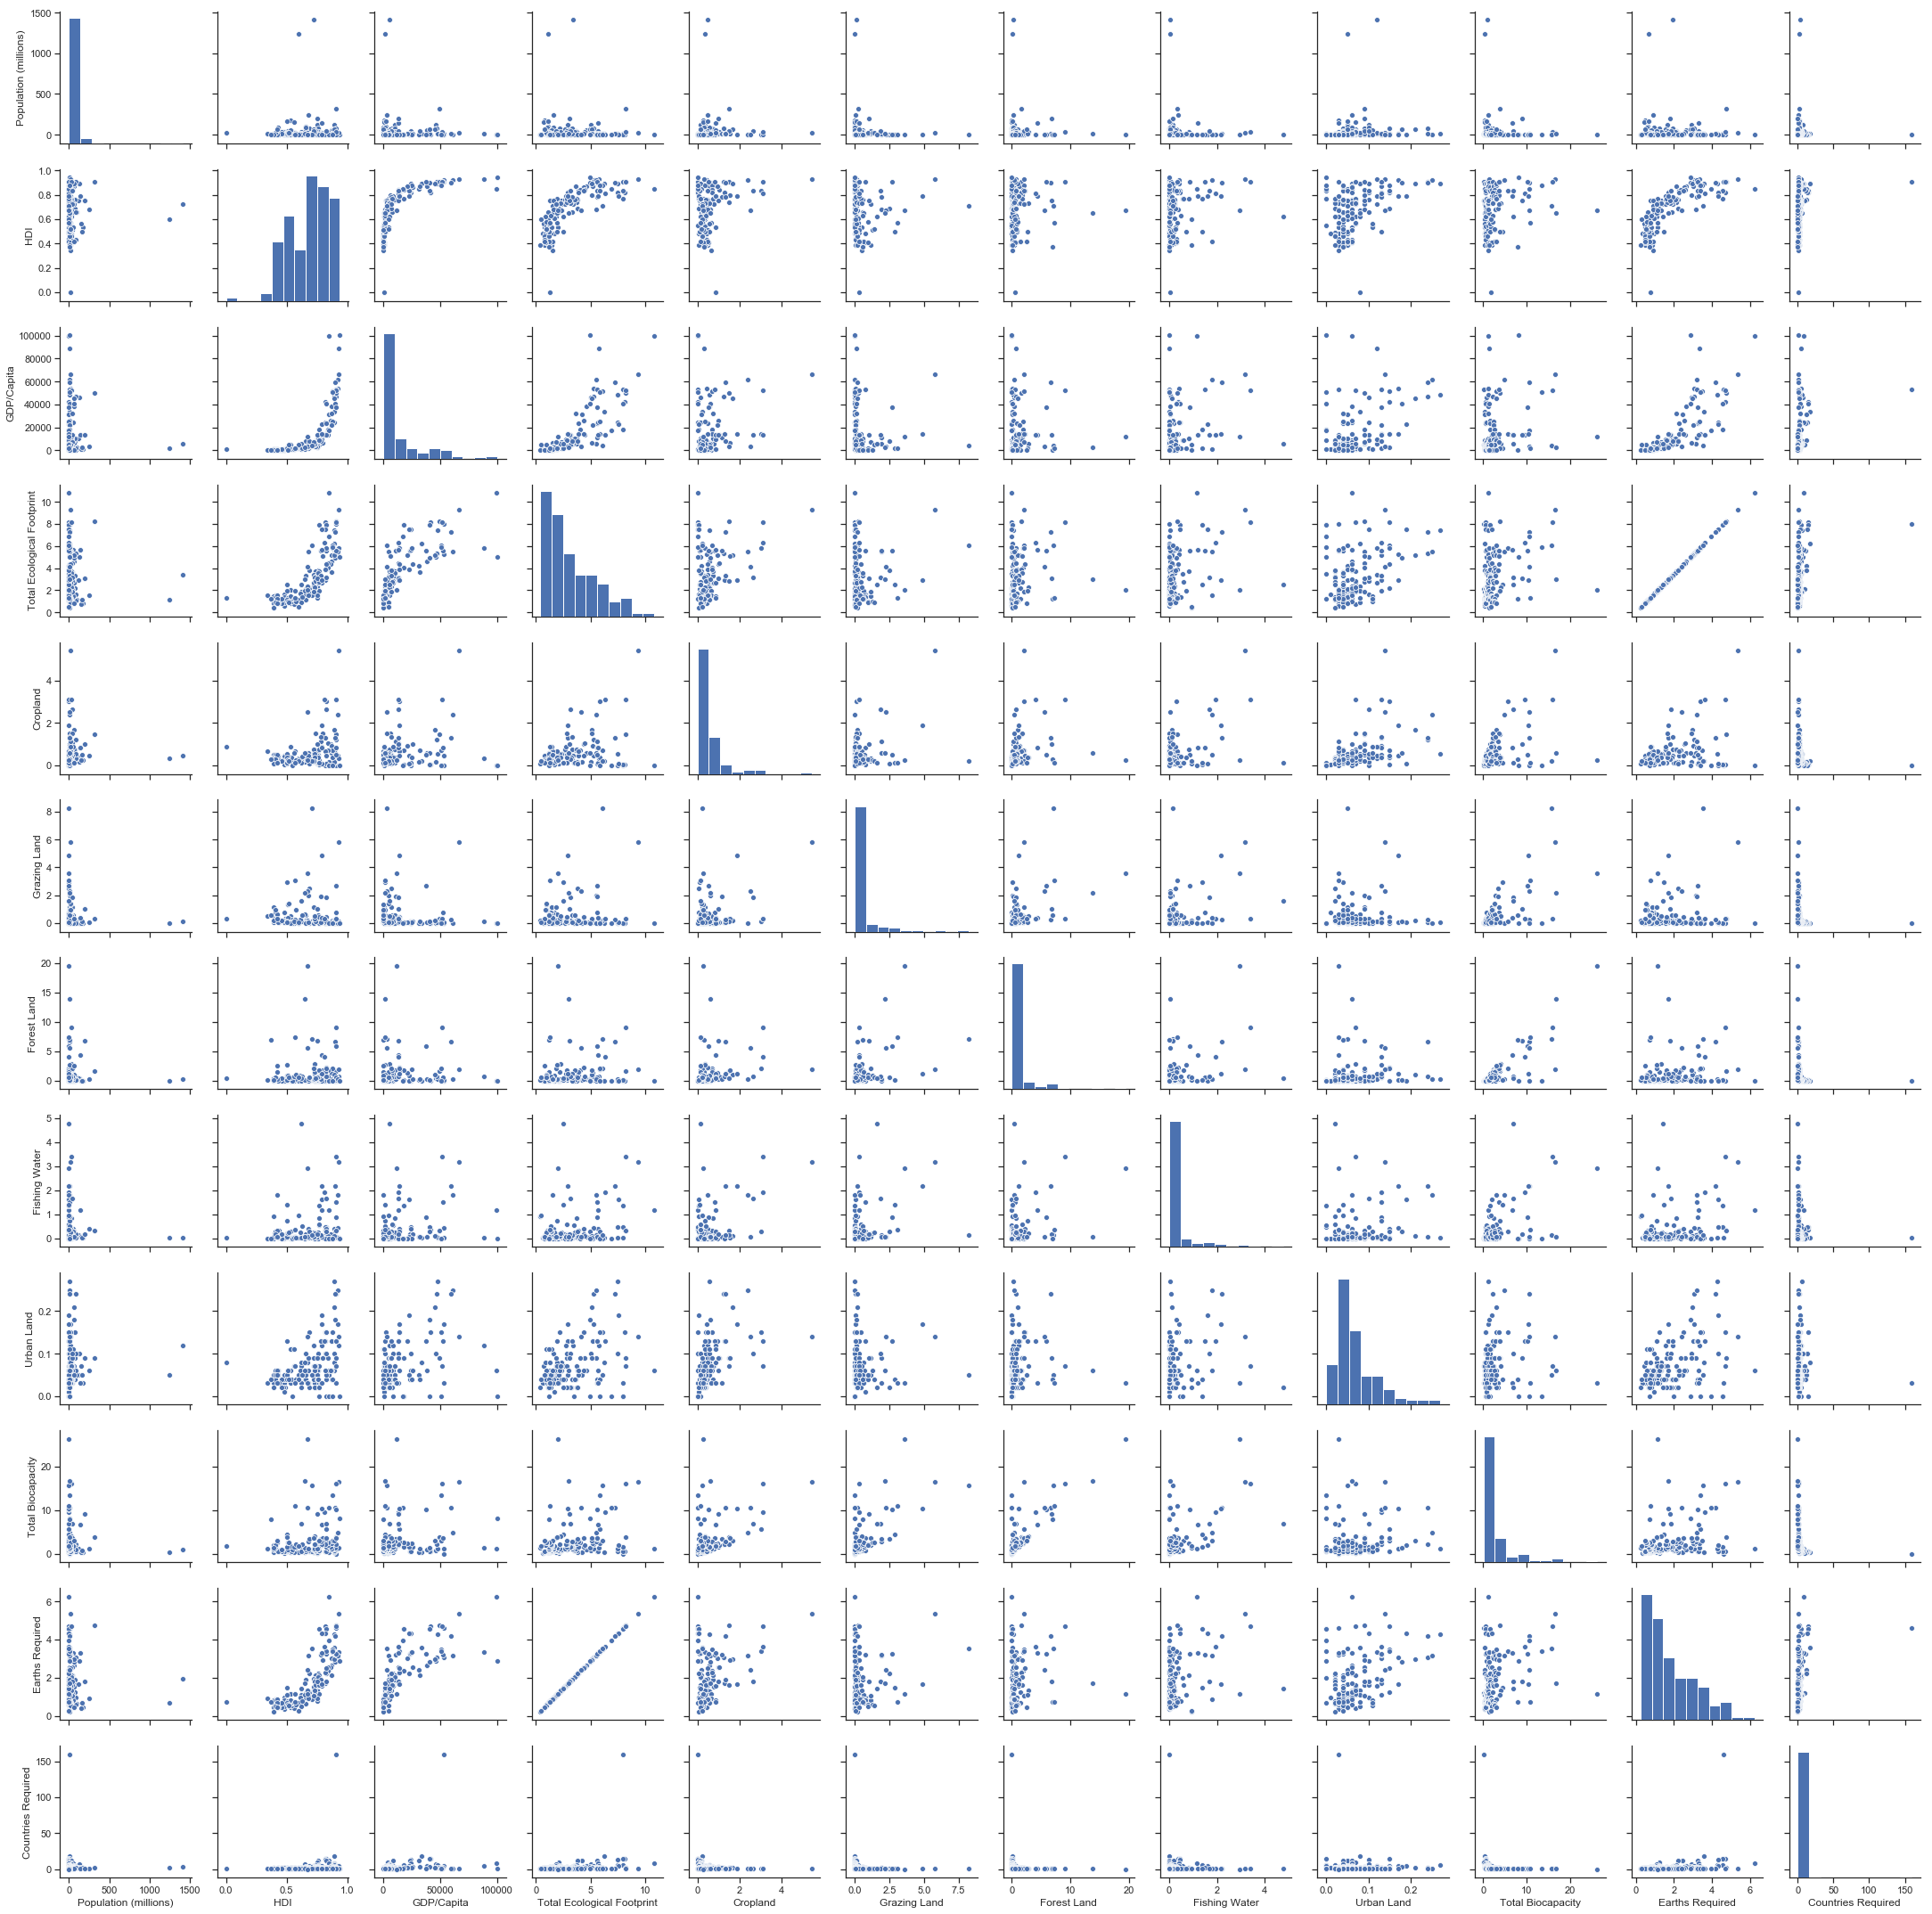

In [10]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data)

<font size="+1" color="RED">**[Q]**</font> Que pensez-vous de la corrélation entre la variable "Total Ecological Footprint" et la variable "Earths Required"?

Les points très rapprochés entre des deux variables indiquent une forte corrélation, donc la quantité de terre utilisée agit fortement sur l'empreinte écologique laissé par l'homme.

### Expérimentations

In [11]:
data.head()

,Country,Region,Population (millions),HDI,GDP/Capita,Total Ecological Footprint,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Earths Required,Countries Required
0,Singapore,Asia-Pacific,5.300,0.91,53122.4,7.97,0.00,0.00,0.00,0.01,0.03,0.05,4.61,159.47
1,Israel,Middle East/Central Asia,7.640,0.89,33718.9,6.22,0.22,0.01,0.03,0.02,0.08,0.35,3.59,17.59
2,Kuwait,Middle East/Central Asia,3.250,0.82,41830.5,8.13,0.02,0.01,0.00,0.37,0.15,0.55,4.70,14.68
3,United Arab Emirates,Middle East/Central Asia,9.206,0.83,40817.4,7.93,0.02,0.00,0.07,0.47,0.00,0.56,4.58,14.16
4,Bahrain,Middle East/Central Asia,1.320,0.82,24299.0,7.49,0.01,0.00,0.00,0.46,0.10,0.58,4.33,12.96


<font size="+1" color="RED">**[Q]**</font> A partir de <code>data</code>, proposer et tester un classifieur permettant de prédire si le pays est de la région <code>European Union</code> ou non en utilisant la description composée uniquement des variables <code>Population (millions)</code>, <code>HDI</code>, <code>GDP/Capita</code>, <code>Total Ecological Footprint</code>, et <code>Earth Required</code>.

In [12]:
dataEU= data[['Region','Population (millions)','Total Ecological Footprint']]
dataEU['Region']= dataEU['Region'].apply(lambda x: 1 if x=='European Union' else -1)

In [13]:
dataEU[0:6]

,Region,Population (millions),Total Ecological Footprint
0,-1,5.300,7.97
1,-1,7.640,6.22
2,-1,3.250,8.13
3,-1,9.206,7.93
4,-1,1.320,7.49
5,1,1.130,4.21


In [14]:
d= km.normalisation(dataEU.iloc[: , 1:]) #normalisation des données
d['Region']= pd.Series(dataEU['Region'])

In [15]:
sete = ls.LabeledSet(2) 
e= dataEU.apply(lambda l: sete.addExample(l.tolist()[1:],l.tolist()[0]),axis=1)
train, test= ut.split(sete,0.6) 

..\iads\Classifiers.py:311: RuntimeWarning: invalid value encountered in add
  self.w += self.learning_rate * (labeledSet.getY(r[i])-np.dot(kx, self.w)) * kx


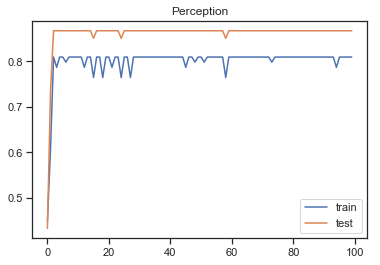

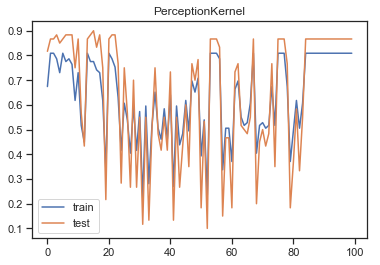

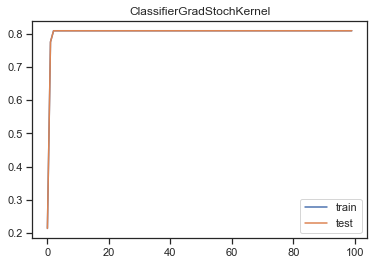

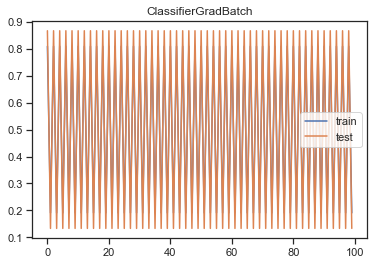

In [16]:
nbt= 100
nbtrain= 100

res= [np.zeros(nbt) for i in range(4)]
rest= [np.zeros(nbt) for i in range(4)]

p= [cl.ClassifierPerceptron(2,0.00001),cl.ClassifierPerceptronKernel(6,0.001,ut.KernelPoly()),cl.ClassifierGradiantStochastiqueKernel(6,0.0001,ut.KernelPoly()),cl.ClassifierGradiantBatch(2,0.0001)]

for i in range(len(p)):
    res[i][0] = p[i].accuracy(train)
    rest[i][0] = p[i].accuracy(test)

for j in range(nbtrain):
    for i in range(len(p)):
        p[i].train(train)
    for i in range(len(res)):
        res[i][j]= p[i].accuracy(train)
        rest[i][j]= p[i].accuracy(test)
        
nbarr= np.arange(nbt)
plt.title("Perception")
plt.plot(nbarr, res[0] , label = "train")
plt.plot(nbarr, rest[0] , label = "test")
plt.legend(loc = "best")
plt.show()

plt.title("PerceptionKernel")
plt.plot(nbarr, res[1], label = "train")
plt.plot(nbarr, rest[1], label = "test")
plt.legend(loc = "best")
plt.show()

plt.title("ClassifierGradStochKernel")
plt.plot(nbarr, res[2], label = "train")
plt.plot(nbarr, res[2], label = "test")
plt.legend(loc = "best")
plt.show()

plt.title("ClassifierGradBatch")
plt.plot(nbarr, res[3], label = "train")
plt.plot(nbarr, rest[3], label = "test")
plt.legend(loc = "best")
plt.show()
# ut.plot_frontiere(train,p,nbt)
# ut.plot2DSet(train)

<font size="+1" color="RED">**[Q]**</font>  La variable <code>Region</code> est une variable catégorielle qui peut être utilisée en description.
En utilisant la méthode *one-hot encoding* vue en cours, remplacer la variable <code>Region</code> afin d'avoir un dataset décrit que par des variables numériques. On appelle <code>data_num</code> le dataset correspondant.


In [14]:
region= pd.Series(list(data['Region']))

In [15]:
pd.get_dummies(region)

,Africa,Asia-Pacific,European Union,Latin America,Middle East/Central Asia,North America,Northern/Eastern Europe
0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0
5,0,0,1,0,0,0,0
6,0,0,0,0,1,0,0
7,0,0,0,0,1,0,0
8,0,0,0,0,1,0,0
9,0,0,0,0,1,0,0


In [18]:
d= km.normalisation(dataEU.iloc[: , 1:])
data_num= pd.concat([pd.get_dummies(region),d],axis=1)

In [19]:
data_num

,Africa,Asia-Pacific,European Union,Latin America,Middle East/Central Asia,North America,Northern/Eastern Europe,Population (millions),Total Ecological Footprint
0,0,1,0,0,0,0,0,0.002978,0.727360
1,0,0,0,0,1,0,0,0.004641,0.558767
2,0,0,0,0,1,0,0,0.001521,0.742775
3,0,0,0,0,1,0,0,0.005754,0.723507
4,0,0,0,0,1,0,0,0.000149,0.681118
5,0,0,1,0,0,0,0,0.000014,0.365125
6,0,0,0,0,1,0,0,0.002516,0.329480
7,0,0,0,0,1,0,0,0.019319,0.500000
8,0,0,0,0,1,0,0,0.004194,0.161850
9,0,0,0,0,1,0,0,0.000668,1.000000


<font size="+1" color="RED">**[Q]**</font> Appliquer l'algorithme des $k$-moyennes sur <code>data_num</code>  (pensez à ne pas considérer la variable <code>Country</code>). Quelle valeur de $k$ vous semble la plus pertinente ?

In [ ]:
for i in range(1,5):
    les_centresRand1, l_affectationRand1 = km.kmoyennes(i, data_num, 0.05, 100)

iteration  1  Inertie :  146.77832321068965  Difference: 0.0
iteration  1  Inertie :  123.71222315627162  Difference: 7.14810869116198
iteration  2  Inertie :  108.65155333257101  Difference: 15.060669823700607
iteration  3  Inertie :  128.24677197726265  Difference: 19.59521864469164
iteration  4  Inertie :  121.48133028146158  Difference: 6.765441695801073
iteration  5  Inertie :  134.49955591971064  Difference: 13.018225638249064
iteration  6  Inertie :  118.80692852726182  Difference: 15.692627392448827
iteration  7  Inertie :  116.61908807114787  Difference: 2.187840456113946
iteration  8  Inertie :  115.16552561164141  Difference: 1.4535624595064576
iteration  9  Inertie :  109.53992613679591  Difference: 5.625599474845501
iteration  10  Inertie :  109.70625372256949  Difference: 0.16632758577357265
iteration  11  Inertie :  115.16552561164141  Difference: 5.459271889071928
iteration  12  Inertie :  123.43223733214495  Difference: 8.266711720503537
iteration  13  Inertie :  117.0

iteration  56  Inertie :  96.4355313997392  Difference: 7.9227534866464
iteration  57  Inertie :  110.05028653281772  Difference: 13.614755133078518
iteration  58  Inertie :  107.7550785852529  Difference: 2.295207947564819
iteration  59  Inertie :  91.08503445531113  Difference: 16.670044129941772
iteration  60  Inertie :  116.59498059638246  Difference: 25.509946141071325
iteration  61  Inertie :  90.50579293748964  Difference: 26.08918765889281
iteration  62  Inertie :  97.78404582773675  Difference: 7.278252890247103
iteration  63  Inertie :  98.55039297504679  Difference: 0.7663471473100429
iteration  64  Inertie :  97.28021202781578  Difference: 1.2701809472310117
iteration  65  Inertie :  107.35017600147643  Difference: 10.069963973660649
iteration  66  Inertie :  97.58713210846653  Difference: 9.763043893009893
iteration  67  Inertie :  85.33347282809908  Difference: 12.253659280367458
iteration  68  Inertie :  113.25528402218504  Difference: 27.92181119408596
iteration  69  In

<font size="+1" color="RED">**[Q]**</font> Construire un nouveau dataset obtenu à partir de <code>data_num</code> en remplaçant la variable <code>Countries Required</code> par une variable catégorielle à 2 valeurs obtenue grâce à l'approche de discrétisation vue dans le cours 11. On appelle <code>data_class</code> ce nouveau dataset.

<font size="+1" color="RED">**[Q]**</font> Expérimenter 2 algorithmes d'apprentissage supervisé sur <code>data_class</code> (vous réaliserez une validation croisée afin d'obtenir un taux de bonne classification moyen et un écart type). Que pouvez-vous en conclure?

## Préparation pour le projet

Le temps restant de la séance est consacré au projet.